<a href="https://colab.research.google.com/github/ParasNandwani/DeepLearningWithTensorflow/blob/master/TensorFlowLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#Loading data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-07-09 07:45:50--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-07-09 07:45:51 (36.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
#load data
data=pd.read_csv('moore.csv',header=None).values
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [4]:
X=data[:,0].reshape(-1,1)
X
Y=data[:,1]
Y

array([       2300,        3500,        2500,        2500,        4100,
              4500,        8000,        3510,        5000,        8500,
              6500,        9000,       29000,       17500,       29000,
             68000,       11500,       55000,      134000,       22000,
             63000,      190000,      275000,       25000,       16000,
            110000,      375000,       30000,      385000,      730000,
            273000,      553000,      180000,      250000,      600000,
           1000000,     1180235,      310000,     1200000,     1350000,
             35000,      600000,      900000,     2800000,     3100000,
            578977,     2500000,     2500000,      111000,     5500000,
           4300000,    10000000,     7500000,     8800000,     7500000,
           9500000,    13500000,    21000000,    21000000,    27400000,
          21300000,    22000000,    42000000,   191000000,    45000000,
          55000000,   112000000,   400000000,   169000000,   184

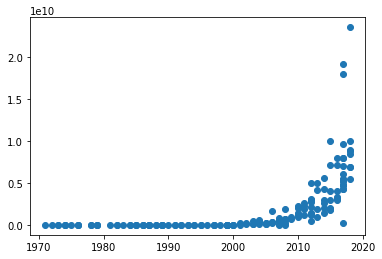

In [5]:
plt.scatter(X,Y)

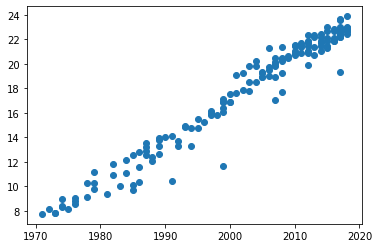

In [6]:
#Since we want linear model we will log
Y=np.log(Y)
plt.scatter(X,Y)

In [7]:
#scalling values
X=X-X.mean()

In [8]:
X

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086],
       [-26.19753086],
       [-24.19753086],
       [-24.19753086],
       [-23.19753086],
       [-23.19753086],
       [-23.19753086],
       [-21.19753086],
       [-20.19753086],
       [-20.19753086],
       [-19.19753086],
       [-18.19753086],
       [-18.19753086],
       [-17.19753086],
       [-17.19753086],
       [-17.19753086],
       [-16.19753086],
       [-16.19753086],
       [-16.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-14.19753086],
       [-14.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-12.19753086],
       [-11.19753086],
       [-11.19753086],
       [-10.19753086],
       [-10.19753086],
       [ -9

In [16]:
#now create tesorflow model
# model=tf.keras.models.Sequential(
#       tf.keras.layers.Input(shape=(1,)),
#       tf.keras.layers.Dense(1)
# )

# model=tf.keras.models.Sequential(
#       tf.keras.layers.Input(shape=(1,)),
#       tf.keras.layers.Dense(1)
# )

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
# tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs)
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

In [17]:
def schedule(epoch,lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)


In [18]:
r=model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 340.1423 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 288.0244 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 240.2801 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 199.8944 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 206.4892 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 132.7550 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 116.3311 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 79.4108 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 60.2240 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 49.5999 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

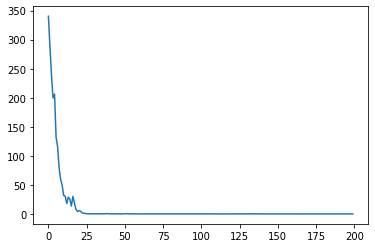

In [19]:
plt.plot(r.history['loss'],label='loss')

In [20]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34385157]], dtype=float32), array([17.76865], dtype=float32)]


In [21]:
a = model.layers[0].get_weights()[0][0,0]
a

0.34385157

In [22]:
print("Time to double",np.log(2)/a)

Time to double 2.0158325523681584


In [25]:
Y

array([ 7.7406644 ,  8.16051825,  7.82404601,  7.82404601,  8.31874225,
        8.41183268,  8.98719682,  8.16337132,  8.51719319,  9.04782144,
        8.77955746,  9.10497986, 10.27505111,  9.76995616, 10.27505111,
       11.12726298,  9.35010231, 10.91508846, 11.80559508,  9.99879773,
       11.05089001, 12.15477935, 12.52452638, 10.1266311 ,  9.680344  ,
       11.60823564, 12.8346813 , 10.30895266, 12.86099861, 13.50079981,
       12.51722707, 13.22311328, 12.10071213, 12.4292162 , 13.30468493,
       13.81551056, 13.98122413, 12.64432758, 13.99783211, 14.11561515,
       10.46310334, 13.30468493, 13.71015004, 14.84512998, 14.94691267,
       13.26901803, 14.73180129, 14.73180129, 11.61728548, 15.52025865,
       15.27412558, 16.11809565, 15.83041358, 15.99026228, 15.83041358,
       16.06680236, 16.41820024, 16.860033  , 16.860033  , 17.12605357,
       16.87421763, 16.90655301, 17.55318018, 19.06778399, 17.62217305,
       17.82284374, 18.53400943, 19.80697511, 18.94540927, 19.03

In [24]:
np.array(Y)

array([ 7.7406644 ,  8.16051825,  7.82404601,  7.82404601,  8.31874225,
        8.41183268,  8.98719682,  8.16337132,  8.51719319,  9.04782144,
        8.77955746,  9.10497986, 10.27505111,  9.76995616, 10.27505111,
       11.12726298,  9.35010231, 10.91508846, 11.80559508,  9.99879773,
       11.05089001, 12.15477935, 12.52452638, 10.1266311 ,  9.680344  ,
       11.60823564, 12.8346813 , 10.30895266, 12.86099861, 13.50079981,
       12.51722707, 13.22311328, 12.10071213, 12.4292162 , 13.30468493,
       13.81551056, 13.98122413, 12.64432758, 13.99783211, 14.11561515,
       10.46310334, 13.30468493, 13.71015004, 14.84512998, 14.94691267,
       13.26901803, 14.73180129, 14.73180129, 11.61728548, 15.52025865,
       15.27412558, 16.11809565, 15.83041358, 15.99026228, 15.83041358,
       16.06680236, 16.41820024, 16.860033  , 16.860033  , 17.12605357,
       16.87421763, 16.90655301, 17.55318018, 19.06778399, 17.62217305,
       17.82284374, 18.53400943, 19.80697511, 18.94540927, 19.03

In [26]:
np.array(X).flatten()

array([-31.19753086, -30.19753086, -29.19753086, -29.19753086,
       -28.19753086, -28.19753086, -28.19753086, -27.19753086,
       -26.19753086, -26.19753086, -26.19753086, -24.19753086,
       -24.19753086, -23.19753086, -23.19753086, -23.19753086,
       -21.19753086, -20.19753086, -20.19753086, -19.19753086,
       -18.19753086, -18.19753086, -17.19753086, -17.19753086,
       -17.19753086, -16.19753086, -16.19753086, -16.19753086,
       -15.19753086, -15.19753086, -15.19753086, -15.19753086,
       -14.19753086, -14.19753086, -13.19753086, -13.19753086,
       -13.19753086, -13.19753086, -12.19753086, -11.19753086,
       -11.19753086, -10.19753086, -10.19753086,  -9.19753086,
        -9.19753086,  -8.19753086,  -8.19753086,  -7.19753086,
        -3.19753086,  -7.19753086,  -6.19753086,  -5.19753086,
        -5.19753086,  -5.19753086,  -4.19753086,  -3.19753086,
        -3.19753086,  -2.19753086,  -2.19753086,  -3.19753086,
        -3.19753086,  -3.19753086,  -2.19753086,  -1.19

In [27]:
#Analytical  Solution
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


#Making Predictions

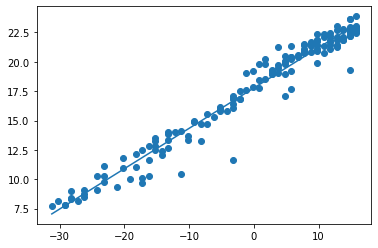

In [30]:
Yhat=model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [31]:
#Manual Calculation
#get weights=
w,b=model.layers[0].get_weights()
X=X.reshape(-1,1)

Yhat2=(X.dot(w)+b).flatten()

np.allclose(Yhat,Yhat2)

True